In [1]:
import matplotlib.pyplot as plt
import TrendPy.methods as tm
import numpy as np


In [2]:

x = [1, 2, 3]

y = [1, 1.5, 3.5]

a, b = tm.linreg(x, y)


In [3]:
type(x)

list

In [4]:
x = np.array(x)

type(x)


numpy.ndarray

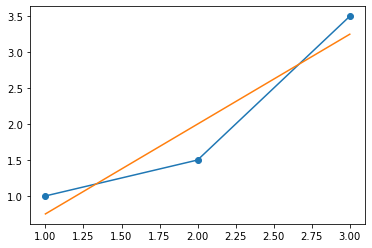

In [5]:



plt.plot(x, y, marker='o')
plt.plot(x, a*x+b)




#print(type(x))

